In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('nba.csv')
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0


In [4]:
df['Attended_College'] = df['College'].notnull()
college_counts = df['Attended_College'].value_counts()
college_counts

Attended_College
True     373
False     85
Name: count, dtype: int64

**<h2>College vs Non-College Players</h2>**

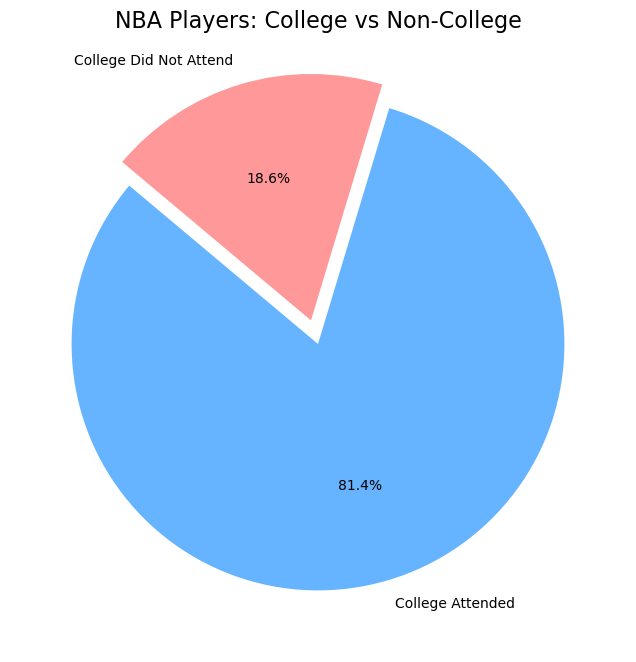

In [6]:
plt.figure(figsize=(8,8))
plt.pie(college_counts, labels=['College Attended', 'College Did Not Attend'], autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], 
        explode=[0, 0.1], startangle=140)
plt.title('NBA Players: College vs Non-College', fontsize=16)
plt.show()

**<h2>Data Cleaning</h2>**

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(364, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 456
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              364 non-null    object 
 1   Team              364 non-null    object 
 2   Number            364 non-null    float64
 3   Position          364 non-null    object 
 4   Age               364 non-null    float64
 5   Height            364 non-null    object 
 6   Weight            364 non-null    float64
 7   College           364 non-null    object 
 8   Salary            364 non-null    float64
 9   Attended_College  364 non-null    bool   
dtypes: bool(1), float64(4), object(5)
memory usage: 28.8+ KB


In [11]:
new_df = df.groupby('Team')

In [12]:
for team, data in new_df:
    max_age = data['Age'].max()
    max_age_index = data['Age'].idxmax()
    player_name = data.loc[max_age_index, 'Name']
    print(f"Team is {team}\nMax Age is {data['Age'].max()} and player name is {player_name}\n")

Team is Atlanta Hawks
Max Age is 35.0 and player name is Kirk Hinrich

Team is Boston Celtics
Max Age is 27.0 and player name is Isaiah Thomas

Team is Brooklyn Nets
Max Age is 32.0 and player name is Jarrett Jack

Team is Charlotte Hornets
Max Age is 30.0 and player name is Tyler Hansbrough

Team is Chicago Bulls
Max Age is 35.0 and player name is Mike Dunleavy

Team is Cleveland Cavaliers
Max Age is 35.0 and player name is Richard Jefferson

Team is Dallas Mavericks
Max Age is 33.0 and player name is Devin Harris

Team is Denver Nuggets
Max Age is 36.0 and player name is Mike Miller

Team is Detroit Pistons
Max Age is 36.0 and player name is Steve Blake

Team is Golden State Warriors
Max Age is 32.0 and player name is Andre Iguodala

Team is Houston Rockets
Max Age is 38.0 and player name is Jason Terry

Team is Indiana Pacers
Max Age is 30.0 and player name is George Hill

Team is Los Angeles Clippers
Max Age is 38.0 and player name is Paul Pierce

Team is Los Angeles Lakers
Max Age

In [13]:
for team, data in new_df:
    min_age = data['Age'].min()
    min_age_index = data['Age'].idxmin()
    player_name = data.loc[min_age_index, 'Name']
    print(f"Team is {team}\nMin age is {min_age} and player name is {player_name}\n")

Team is Atlanta Hawks
Min age is 24.0 and player name is Tim Hardaway Jr.

Team is Boston Celtics
Min age is 20.0 and player name is James Young

Team is Brooklyn Nets
Min age is 21.0 and player name is Rondae Hollis-Jefferson

Team is Charlotte Hornets
Min age is 21.0 and player name is Aaron Harrison

Team is Chicago Bulls
Min age is 21.0 and player name is Bobby Portis

Team is Cleveland Cavaliers
Min age is 24.0 and player name is Kyrie Irving

Team is Dallas Mavericks
Min age is 22.0 and player name is Justin Anderson

Team is Denver Nuggets
Min age is 21.0 and player name is Gary Harris

Team is Detroit Pistons
Min age is 20.0 and player name is Stanley Johnson

Team is Golden State Warriors
Min age is 20.0 and player name is Kevon Looney

Team is Houston Rockets
Min age is 22.0 and player name is Sam Dekker

Team is Indiana Pacers
Min age is 20.0 and player name is Myles Turner

Team is Los Angeles Clippers
Min age is 23.0 and player name is Branden Dawson

Team is Los Angeles L

**<h2>Team Size Count Plot</h2>**

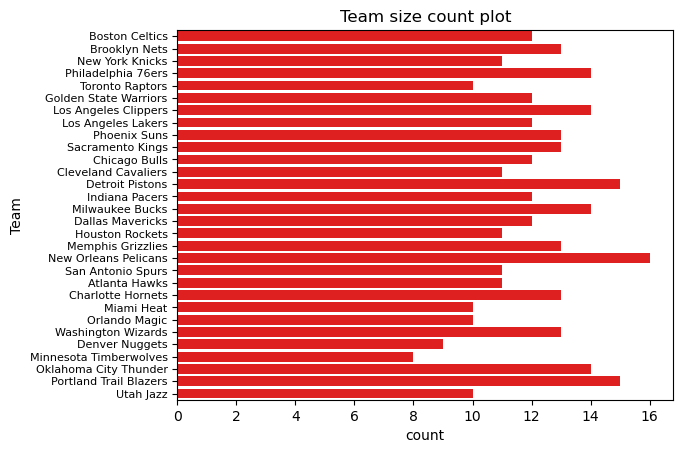

In [15]:
sns.countplot(data=df, y='Team', color='red')
plt.yticks(fontsize=8)
plt.title('Team size count plot', fontsize=12)
plt.show()

In [16]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Attended_College
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,True
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,True
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,True
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0,True
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0,True
...,...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0,True
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0,True
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0,True
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0,True


Text(0.5, 1.0, 'Player Playing Position')

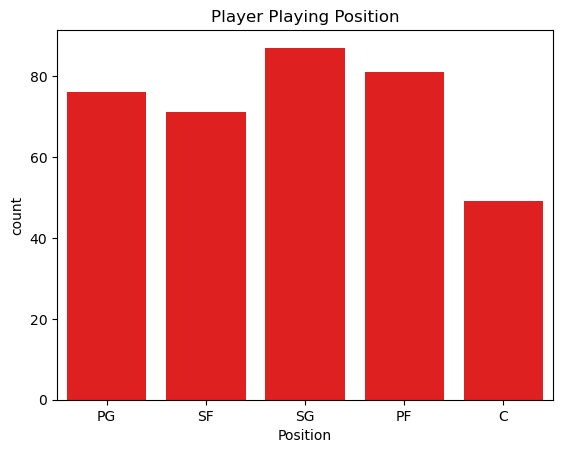

In [17]:
sns.countplot(data=df, x='Position', color='red')
plt.title('Player Playing Position')

In [18]:
df['Salary'] = df['Salary'].astype(float) 

In [19]:
df.drop('Attended_College', axis=1)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1348440.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,981348.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2239800.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0


In [20]:
def convert_salary(Salary):
    return round(Salary, -5)

In [21]:
df['Salary'] = df['Salary'].apply(convert_salary) 

In [22]:
df.sample(50)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Attended_College
152,Aaron Brooks,Chicago Bulls,0.0,PG,31.0,6-0,161.0,Oregon,2200000.0,True
223,Jabari Parker,Milwaukee Bucks,12.0,PF,21.0,6-8,250.0,Duke,5200000.0,True
244,Patrick Beverley,Houston Rockets,2.0,PG,27.0,6-1,185.0,Arkansas,6500000.0,True
153,Jimmy Butler,Chicago Bulls,21.0,SG,26.0,6-7,220.0,Marquette,16400000.0,True
394,Jameer Nelson,Denver Nuggets,1.0,PG,34.0,6-0,190.0,Saint Joseph's,4300000.0,True
294,LaMarcus Aldridge,San Antonio Spurs,12.0,PF,30.0,6-11,240.0,Texas,19700000.0,True
110,Jordan Clarkson,Los Angeles Lakers,6.0,PG,24.0,6-5,194.0,Missouri,800000.0,True
163,Bobby Portis,Chicago Bulls,5.0,PF,21.0,6-11,230.0,Arkansas,1400000.0,True
436,Damian Lillard,Portland Trail Blazers,0.0,PG,25.0,6-3,195.0,Weber State,4200000.0,True
381,Marcus Thornton,Washington Wizards,15.0,SF,29.0,6-4,205.0,LSU,200000.0,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 456
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              364 non-null    object 
 1   Team              364 non-null    object 
 2   Number            364 non-null    float64
 3   Position          364 non-null    object 
 4   Age               364 non-null    float64
 5   Height            364 non-null    object 
 6   Weight            364 non-null    float64
 7   College           364 non-null    object 
 8   Salary            364 non-null    float64
 9   Attended_College  364 non-null    bool   
dtypes: bool(1), float64(4), object(5)
memory usage: 28.8+ KB


**<h2>Salary Distribution</h2>**

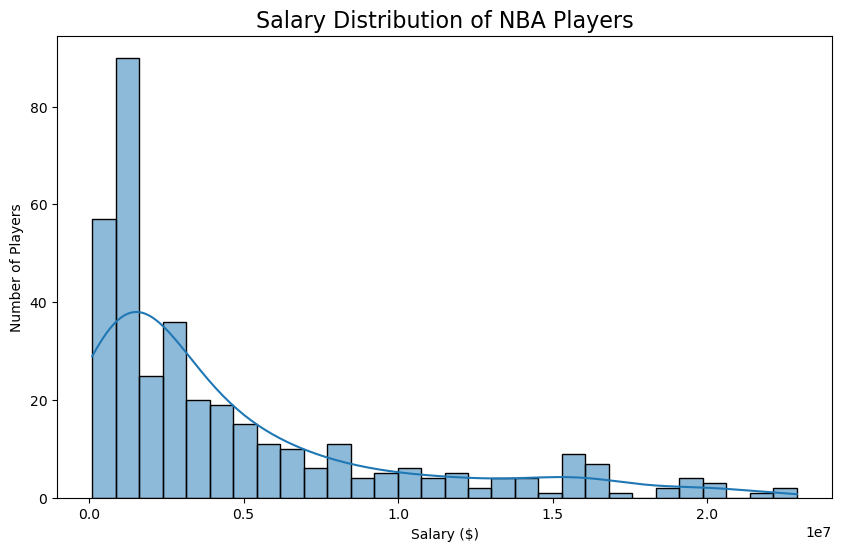

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['Salary'], bins=30, kde=True)
plt.title('Salary Distribution of NBA Players', fontsize=16)
plt.xlabel('Salary ($)')
plt.ylabel('Number of Players')
plt.show()

**<h2>Top 10 Highest Paid Players</h2>**

In [27]:
top10_salary = df.sort_values('Salary', ascending=False).head(10)
top10_salary

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,Attended_College
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22900000.0,True
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22200000.0,True
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21500000.0,True
414,Kevin Durant,Oklahoma City Thunder,35.0,SF,27.0,6-9,240.0,Texas,20200000.0,True
164,Derrick Rose,Chicago Bulls,1.0,PG,27.0,6-3,190.0,Memphis,20100000.0,True
349,Dwyane Wade,Miami Heat,3.0,SG,34.0,6-4,220.0,Marquette,20000000.0,True
174,Kevin Love,Cleveland Cavaliers,0.0,PF,27.0,6-10,251.0,UCLA,19700000.0,True
294,LaMarcus Aldridge,San Antonio Spurs,12.0,PF,30.0,6-11,240.0,Texas,19700000.0,True
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6-11,265.0,Texas A&M,19700000.0,True
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7-0,275.0,Stanford,19700000.0,True


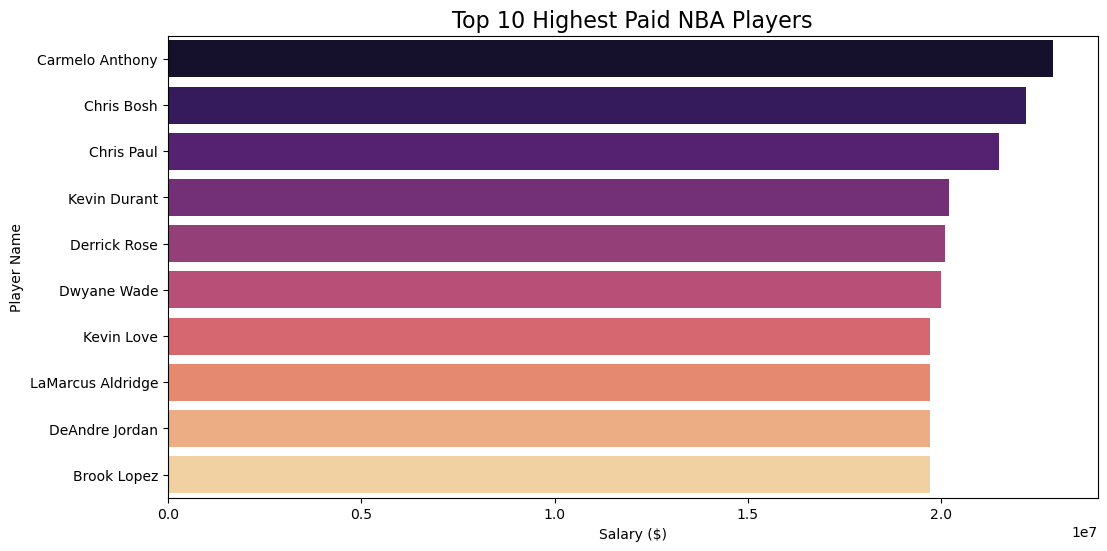

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top10_salary, x='Salary', y='Name', palette='magma', hue='Name')
plt.title('Top 10 Highest Paid NBA Players', fontsize=16)
plt.xlabel('Salary ($)')
plt.ylabel('Player Name')
plt.show()

**<h2>Age vs Salary Scatter Plot</h2>**

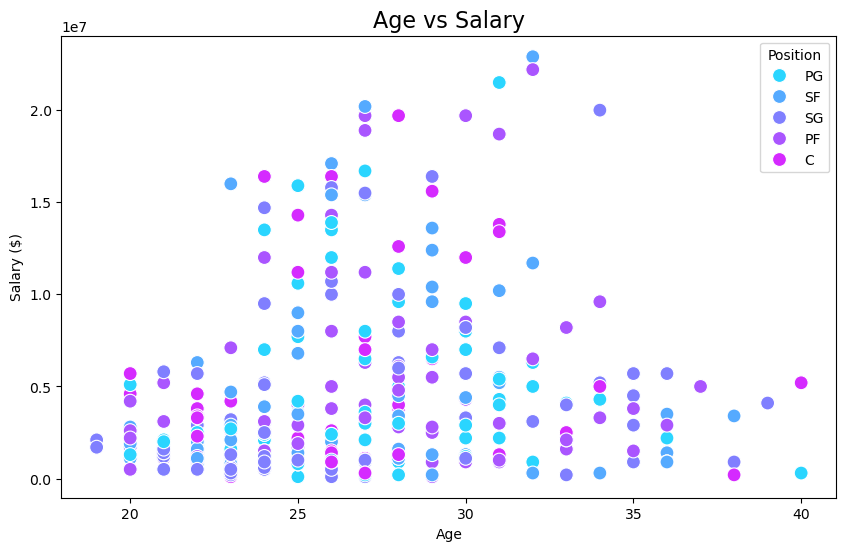

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Position', palette='cool', s=100)
plt.title('Age vs Salary', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Salary ($)')
plt.legend(loc=0, title='Position')
plt.show()

**<h2>Age Distribution Histogram</h2>**

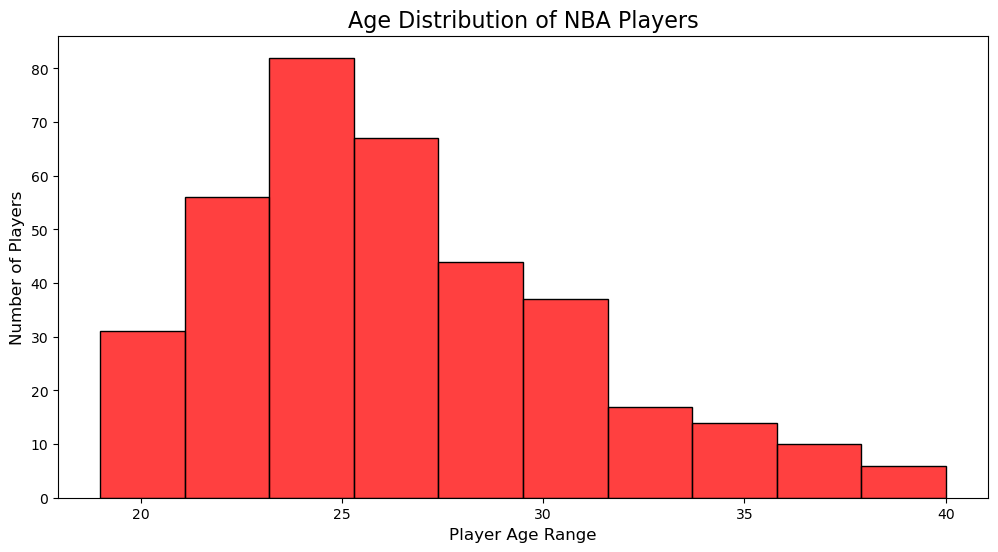

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df['Age'], bins=10, color='red')
plt.title('Age Distribution of NBA Players', fontsize=16)
plt.xlabel('Player Age Range', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.show()

**<h2>Height vs Weight Scatter Plot</h2>**

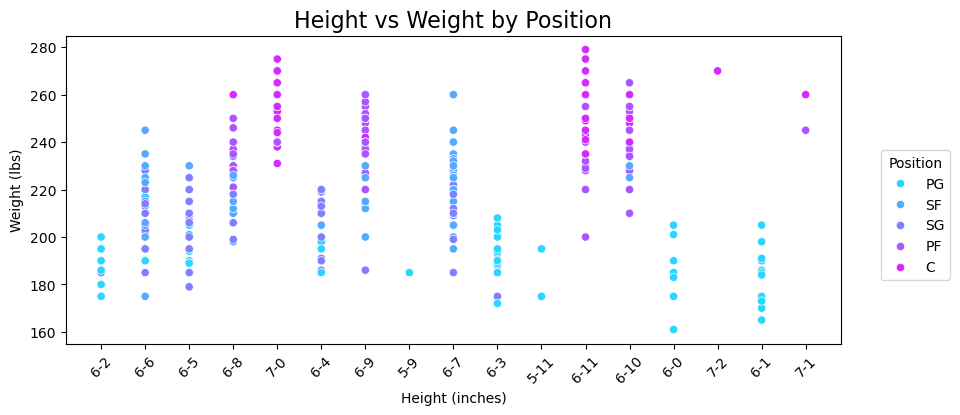

In [34]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='Height', y='Weight', hue='Position', palette='cool')
plt.xticks(rotation=45)
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend(loc='best', bbox_to_anchor=(1.15, 0.65), title='Position')
plt.title('Height vs Weight by Position', fontsize=16)
plt.show()

**<h2>Top Colleges by Player Count</h2>**

In [36]:
df.drop('Attended_College',axis=1, inplace=True)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7700000.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6800000.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1100000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1200000.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2200000.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1300000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,1000000.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2200000.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2400000.0


In [37]:
top_colleges = df['College'].value_counts().head(10)
top_colleges

College
Kentucky          22
Duke              18
Kansas            18
North Carolina    16
UCLA              14
Arizona           13
Florida           10
Texas              9
Syracuse           8
Connecticut        7
Name: count, dtype: int64

In [38]:
top_colleges.index

Index(['Kentucky', 'Duke', 'Kansas', 'North Carolina', 'UCLA', 'Arizona',
       'Florida', 'Texas', 'Syracuse', 'Connecticut'],
      dtype='object', name='College')

In [39]:
top_colleges.values

array([22, 18, 18, 16, 14, 13, 10,  9,  8,  7], dtype=int64)

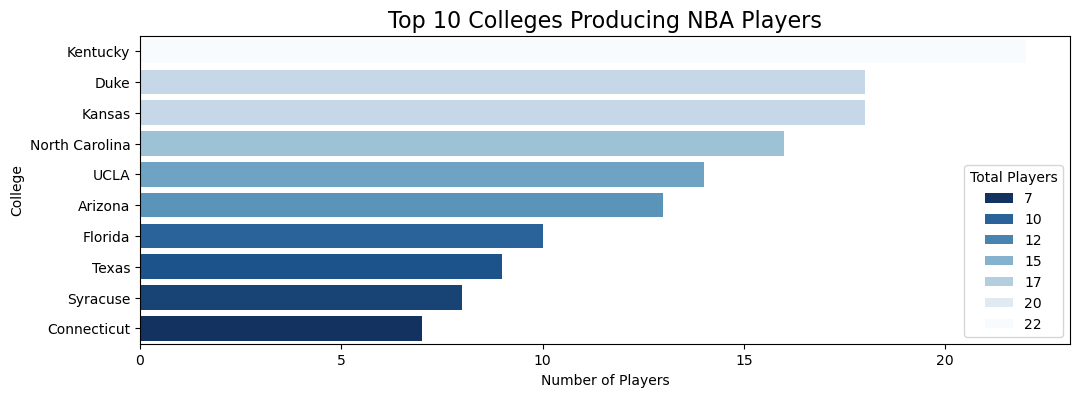

In [40]:
plt.figure(figsize=(12, 4))
sns.barplot(x=top_colleges.values, y=top_colleges.index, hue=top_colleges, palette='Blues_r')
plt.legend(loc=0, bbox_to_anchor=(0.70, 0.70))
plt.title('Top 10 Colleges Producing NBA Players', fontsize=16)
plt.xlabel('Number of Players')
plt.ylabel('College')
plt.legend(title='Total Players')

**<h2>Determining Outliers</h2>**

In [42]:
def lower_upper_bound(data, col):
    q1, q3 = data[col].quantile([0.25, 0.75])
    IQR = q3 - q1
    lower = q1 - 1.5*IQR
    upper = q3 + 1.5*IQR
    return lower, upper

In [43]:
lower, upper = lower_upper_bound(df, 'Weight')
lower, upper

(140.0, 300.0)

In [44]:
df['Weight'].describe()

count    364.000000
mean     219.785714
std       24.793099
min      161.000000
25%      200.000000
50%      220.000000
75%      240.000000
max      279.000000
Name: Weight, dtype: float64

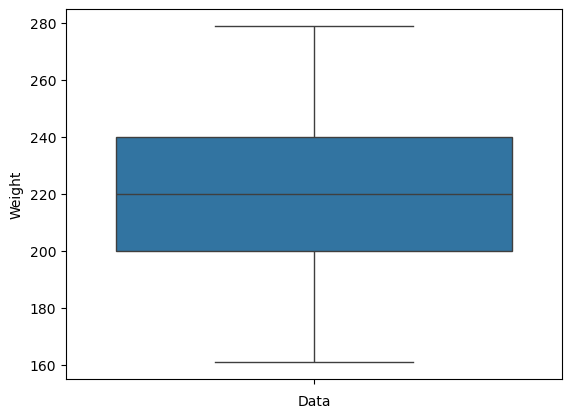

In [45]:
sns.boxplot(data=df, y='Weight')
plt.xlabel('Data')
plt.show()

In [46]:
lower, upper = lower_upper_bound(df, 'Salary')
lower, upper

(-6725000.0, 13875000.0)

In [47]:
df['Salary'].describe()

count    3.640000e+02
mean     4.613736e+06
std      5.125814e+06
min      1.000000e+05
25%      1.000000e+06
50%      2.500000e+06
75%      6.150000e+06
max      2.290000e+07
Name: Salary, dtype: float64

In [48]:
df[(df['Salary'] < lower) | (df['Salary'] > upper)] # Code to detect outliers in the code

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7-0,275.0,Stanford,19700000.0
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22900000.0
82,Draymond Green,Golden State Warriors,23.0,PF,26.0,6-7,230.0,Michigan State,14300000.0
89,Klay Thompson,Golden State Warriors,11.0,SG,26.0,6-7,215.0,Washington State,15500000.0
96,Blake Griffin,Los Angeles Clippers,32.0,PF,27.0,6-10,251.0,Oklahoma,18900000.0
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6-11,265.0,Texas A&M,19700000.0
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21500000.0
111,Roy Hibbert,Los Angeles Lakers,17.0,C,29.0,7-2,270.0,Georgetown,15600000.0
143,DeMarcus Cousins,Sacramento Kings,15.0,C,25.0,6-11,270.0,Kentucky,15900000.0
153,Jimmy Butler,Chicago Bulls,21.0,SG,26.0,6-7,220.0,Marquette,16400000.0


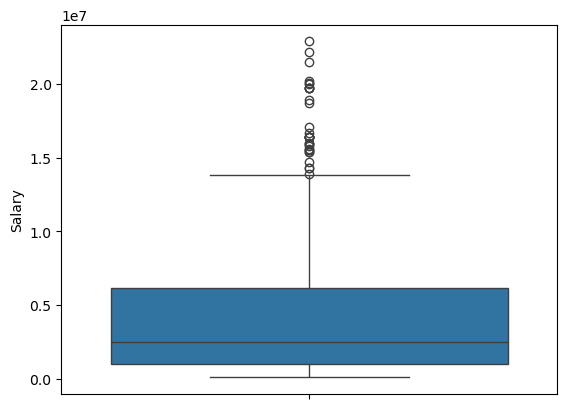

In [49]:
sns.boxplot(data=df, y='Salary')
plt.show()

In [50]:
median_salary = df['Salary'].median()
median_salary

2500000.0

In [51]:
# Replacing Outiers Value with median value
df['Salary'] = df['Salary'].apply(lambda x: median_salary if (x < lower or x > upper) else x) 

In [52]:
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7700000.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6800000.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1100000.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1200000.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2200000.0
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5.0,SG,23.0,6-8,206.0,Duke,1300000.0
451,Chris Johnson,Utah Jazz,23.0,SF,26.0,6-6,206.0,Dayton,1000000.0
452,Trey Lyles,Utah Jazz,41.0,PF,20.0,6-10,234.0,Kentucky,2200000.0
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2400000.0
